In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "IMDb Movies India.csv"
encodings = ['utf-8', 'latin1', 'cp1252', 'iso-8859-1']
df = None
for enc in encodings:
    try:
        df = pd.read_csv(path, encoding=enc)
        used_enc = enc
        break
    except Exception as e:
        last_err = e
else:
    raise last_err
print("Read with encoding:", used_enc)
print("Shape:", df.shape)
print("Columns:", list(df.columns))


Read with encoding: latin1
Shape: (15509, 10)
Columns: ['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


In [4]:
df_clean = df.copy()
df_clean

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_clean['Year'] = df_clean['Year'].astype(str).str.extract(r'(\d{4})')
df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce')

In [7]:
df_clean['Duration'] = df_clean['Duration'].astype(str).str.extract(r'(\d+)')
df_clean['Duration'] = pd.to_numeric(df_clean['Duration'], errors='coerce')

In [8]:
df_clean['Rating'] = pd.to_numeric(df_clean['Rating'], errors='coerce')

In [9]:
if 'Votes' in df_clean.columns:
    df_clean['Votes'] = df_clean['Votes'].astype(str).str.replace(',', '')
    df_clean['Votes'] = pd.to_numeric(df_clean['Votes'], errors='coerce')


In [10]:
df_clean['Primary_Genre'] = df_clean['Genre'].astype(str).str.split(',').str[0].str.strip()

In [11]:

print("Rating description:\n", df_clean['Rating'].describe())
print("Null counts:\n", df_clean.isnull().sum().sort_values(ascending=False).head(20))

Rating description:
 count    7919.000000
mean        5.841621
std         1.381777
min         1.100000
25%         4.900000
50%         6.000000
75%         6.800000
max        10.000000
Name: Rating, dtype: float64
Null counts:
 Duration         8269
Rating           7590
Votes            7590
Actor 3          3144
Actor 2          2384
Genre            1877
Actor 1          1617
Year              528
Director          525
Name                0
Primary_Genre       0
dtype: int64


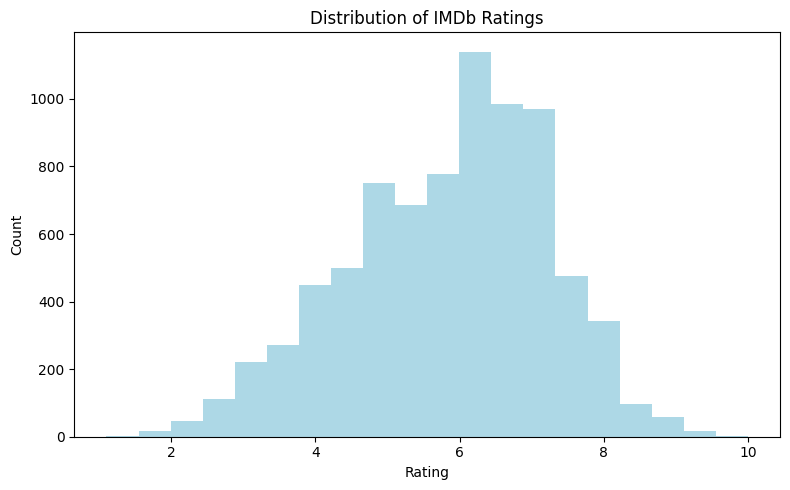

In [21]:
# 4. Visualizations (matplotlib, each separate figure)
plt.figure(figsize=(8,5))
plt.hist(df_clean['Rating'].dropna(), bins=20,color='lightblue')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

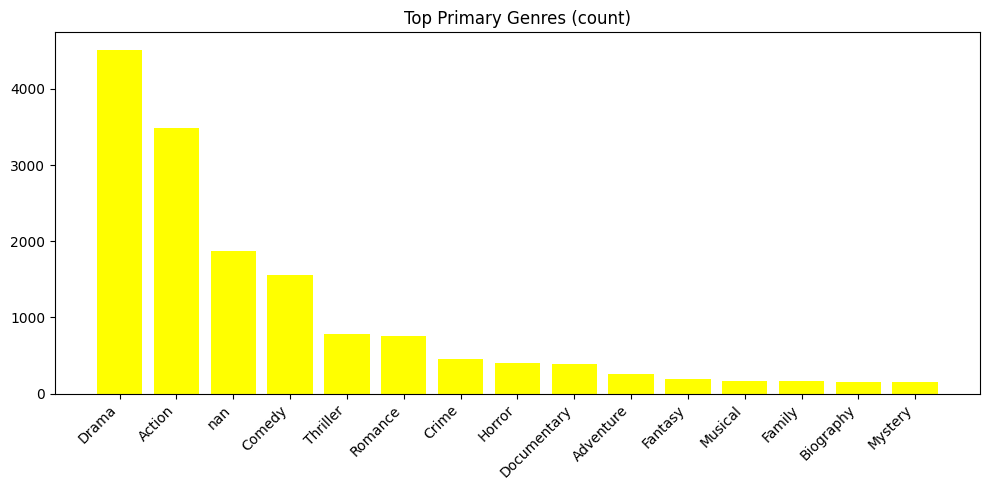

In [27]:
# Top genres
top_genres = df_clean['Primary_Genre'].value_counts().head(15)
plt.figure(figsize=(10,5))
plt.bar(top_genres.index, top_genres.values,color='yellow')
plt.title('Top Primary Genres (count)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


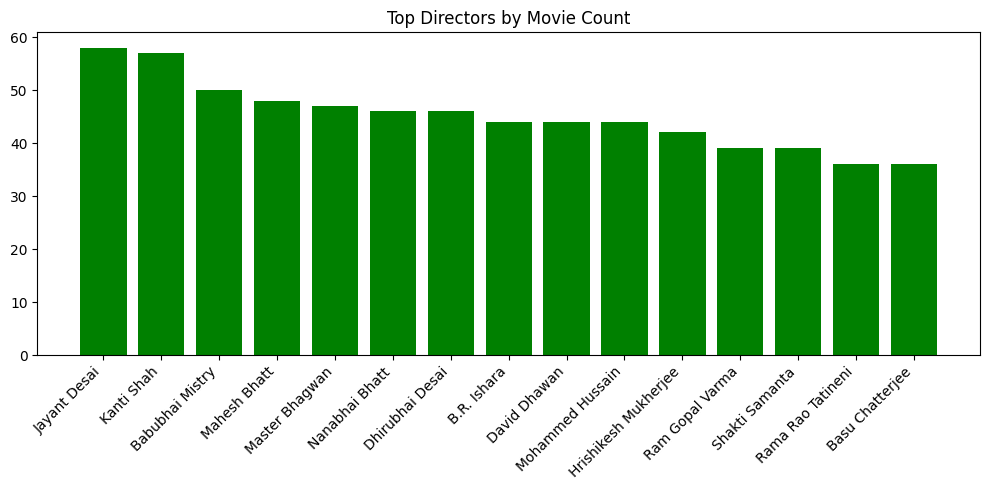

In [29]:
# Top directors
top_directors = df_clean['Director'].value_counts().head(15)
plt.figure(figsize=(10,5))
plt.bar(top_directors.index, top_directors.values,color='green')
plt.title('Top Directors by Movie Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

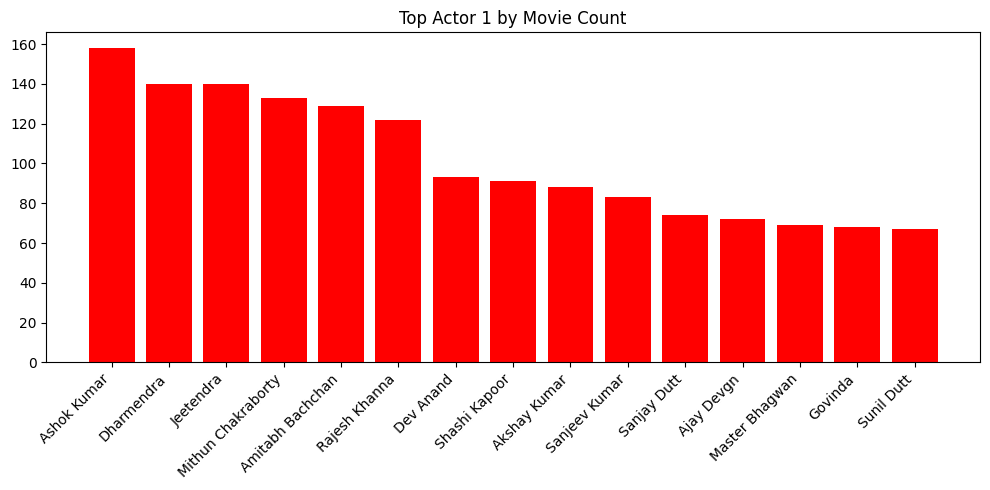

In [65]:
top_actors = df_clean['Actor 1'].dropna().value_counts().head(15)

plt.figure(figsize=(10,5))
plt.bar(top_actors.index, top_actors.values,color='red')
plt.title('Top Actor 1 by Movie Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



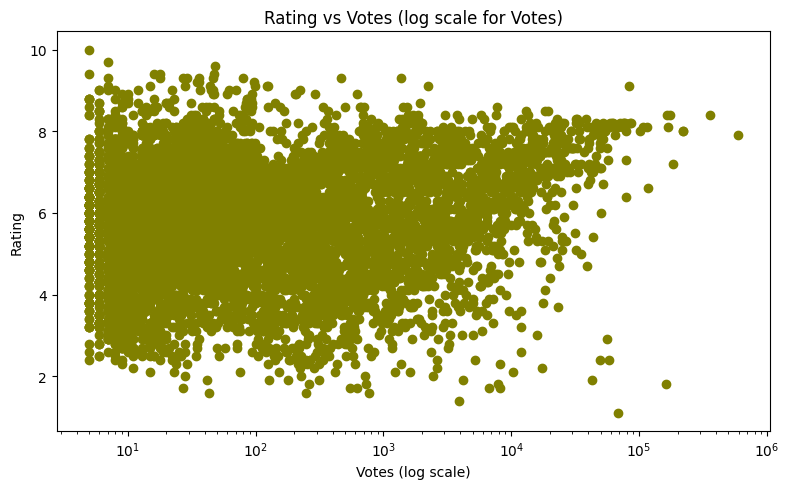

In [38]:
# Rating vs Votes scatter if Votes exists
if 'Votes' in df_clean.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(df_clean['Votes'].dropna(), df_clean['Rating'].dropna(),color='olive')
    plt.xscale('log')
    plt.title('Rating vs Votes (log scale for Votes)')
    plt.xlabel('Votes (log scale)')
    plt.ylabel('Rating')
    plt.tight_layout()
    plt.show()

Correlation matrix:
             Rating      Year  Duration     Votes
Rating    1.000000 -0.166673 -0.031093  0.126635
Year     -0.166673  1.000000 -0.374097  0.129016
Duration -0.031093 -0.374097  1.000000  0.099660
Votes     0.126635  0.129016  0.099660  1.000000


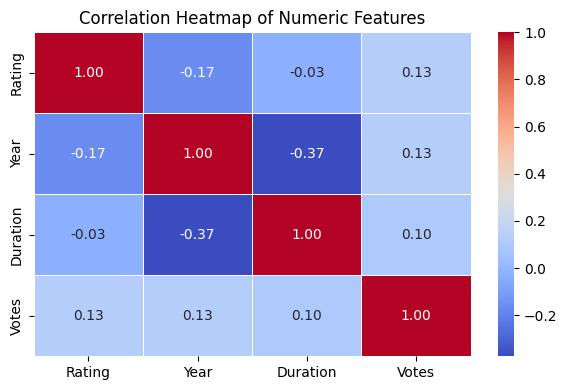

In [66]:
import seaborn as sns

# Correlation
corr = df_clean[['Rating','Year','Duration','Votes']].corr()
print("Correlation matrix:\n", corr)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [54]:
model_df = df_clean[['Rating', 'Year', 'Duration', 'Votes', 'Primary_Genre', 'Director', 'Actor 1']].dropna()

model_df = model_df[(model_df['Actor 1'].notna()) & (model_df['Director'].notna())]

top_genre_list = model_df['Primary_Genre'].value_counts().nlargest(10).index.tolist()
model_df['Primary_Genre'] = model_df['Primary_Genre'].where(model_df['Primary_Genre'].isin(top_genre_list), 'Other')

top_director_list = model_df['Director'].value_counts().nlargest(10).index.tolist()
model_df['Director'] = model_df['Director'].where(model_df['Director'].isin(top_director_list), 'Other')

top_actor_list = model_df['Actor 1'].value_counts().nlargest(10).index.tolist()
model_df['Actor 1'] = model_df['Actor 1'].where(model_df['Actor 1'].isin(top_actor_list), 'Other')

model_df = pd.get_dummies(model_df, columns=['Primary_Genre', 'Director', 'Actor 1'], drop_first=True)


Confusion matrix Random Forest:  12568    8.2
4051     6.0
13424    4.6
15048    5.0
346      4.9
        ... 
15220    5.4
8069     3.4
460      6.6
770      6.9
10867    6.3
Name: Rating, Length: 1156, dtype: float64 [7.326 6.241 4.75  ... 6.914 6.055 4.744]

Model Performance Comparison
-----------------------------------
Random Forest  →  RMSE: 1.1382 | R²: 0.3363
Linear Regress →  RMSE: 1.2824 | R²: 0.1576

Top 15 Important Features (Random Forest):
 Votes                      0.354542
Year                       0.268262
Duration                   0.221966
Primary_Genre_Drama        0.024284
Primary_Genre_Other        0.017599
Primary_Genre_Comedy       0.015479
Primary_Genre_Biography    0.010948
Primary_Genre_Horror       0.010712
Primary_Genre_Crime        0.010449
Actor 1_Other              0.009316
Director_Other             0.006942
Primary_Genre_Thriller     0.006119
Primary_Genre_Romance      0.006060
Primary_Genre_Adventure    0.005001
Actor 1_Akshay Kumar       0.004133


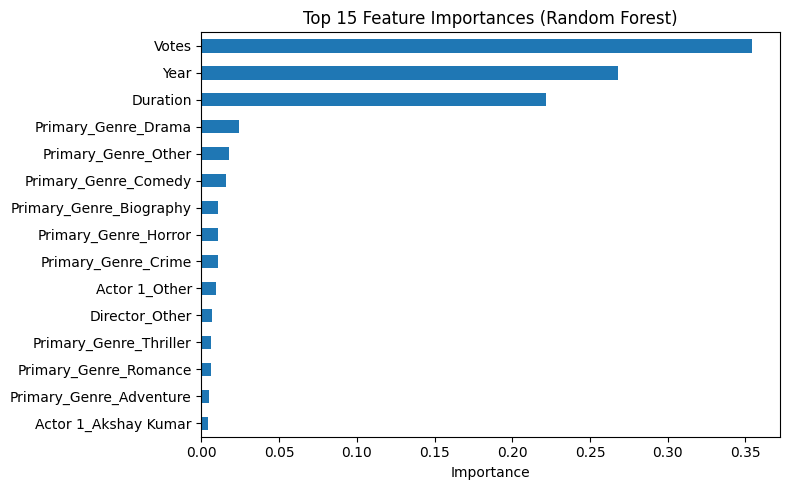

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = model_df.drop(columns=['Rating'])
y = model_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("\nModel Performance Comparison")
print("-" * 35)
print(f"Random Forest  →  RMSE: {rmse_rf:.4f} | R²: {r2_rf:.4f}")
print(f"Linear Regress →  RMSE: {rmse_lr:.4f} | R²: {r2_lr:.4f}")

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
print("\nTop 15 Important Features (Random Forest):\n", importances)

plt.figure(figsize=(8,5))
importances.sort_values().plot(kind='barh')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()